# Exercise: NEISS, Question Set R

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Using codebooks
- Reading tab-separated files
- Ignoring bad lines
- Replacing LOTS of values
- Merging dataframes
- Using numpy/`np.nan`
- Padding strings
- String search using regular expressions

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [1]:
import pandas as pd

In [2]:
dfnss15 = pd.read_csv('nss15.tsv', sep='\t', error_bad_lines=False, converters={'prod1': str, 'prod2':str})

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


In [3]:
dfnss15.head(6)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY
5,150721815,07/02/2015,32,5.6748,C,216,2,1,NaN,71,DOG SCRATCH/BITE,76,1,1,0,1715,,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE..."


### Check that your dataframe has 357727 rows and 19 columns.

In [4]:
dfnss15.shape

(357727, 19)

### List the columns and their data types

In [5]:
dfnss15.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1           object
prod2           object
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [6]:
# Body Part Affected

# Use the codes in the table which follows for the body part affected
# in the product related incident. Also see Appendix C. The body part diagram
# in Appendix D will help you visualize more clearly the boundaries of such parts
# as lower trunk, upper arm, etc.
# In general, if an injury affects more than one body part, code the body part that
# seems to be most seriously hurt. Then, mention other body parts in the Comments.
# Special rules for back injuries, burn injuries, extremity injuries, eye injuries,
# head injuries and injuries which affect the entire body are discussed in the
# section which follows the body part table.

# Cleaning up a column

Take a look at the **body part** column. How many rows of each body part are there?

In [7]:
dfnss15.body_part.value_counts(dropna=False)

75    58677
76    30992
79    30579
92    30463
37    20077
31    19518
35    18957
82    17077
83    15890
30    14822
33    13655
36    12771
34    11565
32     8888
85     8615
88     7336
93     7299
89     6145
77     4661
94     4404
81     4174
80     4016
0      3344
87     2079
38     1699
84       24
Name: body_part, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to pages 11-12 of the column definitions file, or... hey, I typed it in below!

- Tip: If I've already talked about how to replace values, maybe there's a really easy way to replace a lot at once? Maybe I'll tell you if you ask me?

In [8]:
dfnss15.body_part.replace(
{0:  'internal',
30: 'shoulder',
31: 'upper trunk',
32: 'elbow',
33: 'lower arm',
34: 'wrist',
35: 'knee',
36: 'lower leg',
37: 'ankle',
38: 'pubic region',
75: 'head',
76: 'face',
77: 'eyeball',
79: 'lower trunk',
80: 'upper arm',
81: 'upper leg',
82: 'hand',
83: 'foot',
84: '25-50% of body',
85: 'all parts of body',
87: 'not recorded',
88: 'mouth',
89: 'neck',
92: 'finger',
93: 'toe',
94: 'ear'}, inplace=True)

## Confirm you have 58677 head, 30992 face, and 30579 lower trunk.

Isn't this much nicer?

In [9]:
dfnss15.body_part.value_counts(dropna=False)

head                 58677
face                 30992
lower trunk          30579
finger               30463
ankle                20077
upper trunk          19518
knee                 18957
hand                 17077
foot                 15890
shoulder             14822
lower arm            13655
lower leg            12771
wrist                11565
elbow                 8888
all parts of body     8615
mouth                 7336
toe                   7299
neck                  6145
eyeball               4661
ear                   4404
upper leg             4174
upper arm             4016
internal              3344
not recorded          2079
pubic region          1699
25-50% of body          24
Name: body_part, dtype: int64

## Graph the number of each body part, but don’t included the “Not Recorded” records

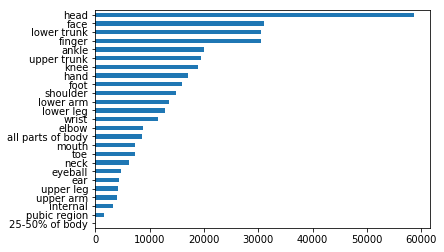

In [10]:
%matplotlib inline
dfnss15[dfnss15.body_part != 'not recorded']['body_part'].value_counts(ascending=True).plot(kind='barh')

## "Not Recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [11]:
import numpy as np
dfnss15.body_part.replace('not recorded', np.nan, inplace=True)
dfnss15.body_part.value_counts(dropna=False)

head                 58677
face                 30992
lower trunk          30579
finger               30463
ankle                20077
upper trunk          19518
knee                 18957
hand                 17077
foot                 15890
shoulder             14822
lower arm            13655
lower leg            12771
wrist                11565
elbow                 8888
all parts of body     8615
mouth                 7336
toe                   7299
neck                  6145
eyeball               4661
ear                   4404
upper leg             4174
upper arm             4016
internal              3344
NaN                   2079
pubic region          1699
25-50% of body          24
Name: body_part, dtype: int64

## Graph the count of each body part, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

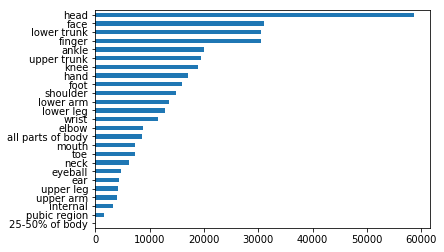

In [12]:
dfnss15.body_part.value_counts(ascending=True).plot(kind='barh')

## For each body part, get the average age of the person who injured that part

Sort from youngest to oldest

In [13]:
dfnss15.groupby('body_part')['age'].agg(['mean'], skipna=False).sort_values(by='mean', ascending=False)

,mean
body_part,
all parts of body,63.406268
internal,62.912978
head,59.512637
mouth,51.241957
lower trunk,49.667844
face,47.749193
upper arm,46.655129
upper trunk,46.587663
upper leg,45.934835


## Wait, "not recorded" seems really really really really old!

How can the average age be like 80???? Read page 6 of the documentation. Fix the issue however you think is best, but explain what you're doing. **It would be nice to talk about this in class if you'd write it on the board!**

### Tech tip you might find useful

If you want to replace a column based on a condition, pandas will probably yell at you. You get to learn this new thing called `loc` now! 

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

In [14]:
dfnss15.body_part.replace(np.nan, 'not recorded', inplace=True)
dfnss15.groupby('body_part')['age'].agg(['mean']).sort_values(by='mean', ascending=False).head(5)

,mean
body_part,
not recorded,79.576239
all parts of body,63.406268
internal,62.912978
head,59.512637
mouth,51.241957


In [15]:
dfnss15[dfnss15['body_part'] == 'not recorded']['age'].value_counts().sort_index(ascending=False).head(25)

223     3
222     3
221     5
220     3
219     4
218     3
217     2
216     6
215     9
214     5
213     9
212     7
211    14
210    11
209    14
208    17
207    31
206    27
205    29
204    38
203    25
202    33
201    55
100     2
99      2
Name: age, dtype: int64

In [16]:
# We will first turn the 0's (not recorded) to Nan
# We will will start with turning the age dtype to string so we can replace using regex
dfnss15.age = dfnss15.age.astype(str) 

In [17]:
dfnss15.age.str.extract('(^0)').value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0    37
Name: age, dtype: int64

In [18]:
dfnss15.age.replace('(^0)', np.nan, regex=True, inplace=True)

In [19]:
dfnss15.age.str.extract('(^0)').value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Series([], Name: age, dtype: int64)

In [20]:
# We will then sort this 2.. years old out. According to the documentation 2.. indicate a
# a patient of under two years old. 2 mean under two yo, while the other two digits
# count the number of completed months the patient infant.
# We will code this into years, following the same logic of completed months to completed years:
# up to 11 months (201-211) as 0 years
# from 12 months (one completed year) to 23 months (212-223) as 1 year
# there is no 224, ie. 24 months (two completed years)

In [21]:
dfnss15.age.str.extract('(20[1-9]|21[0-1])').value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


211    885
210    876
209    856
208    849
207    759
206    669
201    569
205    552
202    433
204    427
203    414
Name: age, dtype: int64

In [22]:
dfnss15.age.str.extract('(21[2-9]|22[0-3])').value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


218    1191
212    1188
220    1135
217    1133
221    1132
222    1099
219    1097
216    1094
215    1093
214    1074
223    1041
213     989
Name: age, dtype: int64

In [23]:
dfnss15.age.replace({'20[1-9]|21[0-1]':'0', '21[2-9]|22[0-3]':'1'}, regex=True, inplace=True)
dfnss15.age.value_counts().head(15)

1     13266
2     11735
3     10117
14     9209
13     8878
15     8779
12     8753
4      8262
11     8044
16     7823
10     7650
5      7633
9      7293
0      7289
6      7282
Name: age, dtype: int64

In [24]:
dfnss15.age = dfnss15.age.astype(float)

In [25]:
dfnss15.groupby('body_part')['age'].agg(['mean'], skipna=False).sort_values(by='mean', ascending=False)

,mean
body_part,
lower trunk,48.754415
not recorded,44.530318
upper trunk,44.357128
25-50% of body,44.333333
upper arm,40.617032
upper leg,37.774796
shoulder,36.905539
neck,36.471277
knee,33.470486


# Finding injuries

## How many people were injured by "Musical instruments, electric or battery operated?"

Try to do what you think would work, then see... it doesn't work. There are all kinds of reasons why it wouldn't work. Keep reading once it doesn't work for you.

- Tip: `prod1` and `prod2` are the product fields
- Tip: You can use the codebook or `cleaned-categories.txt`

In [26]:
pd.read_csv('categories-cleaned.txt').head(6)

,0102,Wringer washing machines
0,106,Electric clothes dryers without washers
1,107,Gas clothes dryers without washers
2,110,Electric heating pads
3,112,Sewing machines or accessories
4,113,Floor buffers or waxers
5,114,Rug shampooers


### Did something go wrong when you read in your data?

Maybe it's one of those problems like we had with `008382` in the homework, where when we read in the file it got rid of the leading zeroes? Try to read the file in again and fix that.

Try to get all of the "Musical instruments, electric or battery operated" injurie again. It still won't work. Keep reading.

In [27]:
product_categories = pd.read_csv('categories-cleaned.txt', names=['product_code', 'product_desc'], converters = {'product_code': str})
product_categories.head(8)

,product_code,product_desc
0,0102,Wringer washing machines
1,0106,Electric clothes dryers without washers
2,0107,Gas clothes dryers without washers
3,0110,Electric heating pads
4,0112,Sewing machines or accessories
5,0113,Floor buffers or waxers
6,0114,Rug shampooers
7,0115,Vacuum cleaners


### Looks the data export is bad!

They turned `0565` into `565` when they exported it or something (so irresponsible!), and it's up to us to fix it. Pad the `prod1` and `prod2` columns to be the proper length. If you didn't actually do the task above it's going to be more difficult.

In [28]:
dfnss15.prod1 = dfnss15.prod1.astype(str).str.pad(4, fillchar='0')
dfnss15.prod1.head(10)

0    1267
1    1439
2    3274
3    0611
4    1893
5    1715
6    1138
7    5040
8    1807
9    4057
Name: prod1, dtype: object

In [29]:
dfnss_products = dfnss15.merge(product_categories, left_on='prod1', right_on='product_code')
dfnss_products.rename(columns = {'product_code':'prod1_code', 'product_desc':'prod1_desc'}, inplace=True)
dfnss_products.head(10)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,prod1_code,prod1_desc
0,150733174,07/11/2015,38,15.7762,V,5.0,1,0,NaN,57,...,lower arm,1,9,0,1267,,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT,1267,"Soccer (activity, apparel or equipment)"
1,150821622,07/20/2015,43,83.2157,S,20.0,2,1,NaN,57,...,lower leg,1,9,0,1267,,L DISTAL FIB FX/20YOWF WHILE PLAYING SOCCER AT...,LE CAUSING INJURY TO DISTAL FIB.,1267,"Soccer (activity, apparel or equipment)"
2,150948626,09/08/2015,37,5.6748,C,10.0,2,0,NaN,57,...,lower arm,1,0,0,1267,,10 YO F TRIPPED FORWARD WHEN PLAYING SOCCER FX...,NaN,1267,"Soccer (activity, apparel or equipment)"
3,151029422,10/06/2015,24,97.9239,M,37.0,1,1,NaN,64,...,knee,1,0,0,1267,,J/ 37 YOM. LT KNEE PAIN AFTER HE KICKED THE BA...,DXL KNEE SPRAIN,1267,"Soccer (activity, apparel or equipment)"
4,151029234,10/10/2015,21,16.5650,V,13.0,2,0,NaN,62,...,head,1,9,0,1267,,13YF H/A&VOMITINGX4 S/P GOT STRUCK TO HEAD C T...,>>CHI,1267,"Soccer (activity, apparel or equipment)"
5,151038066,10/16/2015,21,16.5650,V,13.0,2,0,NaN,64,...,wrist,1,9,0,1267,,13YF WRIST PAIN S/P FOOSH WHILE PLAYING SOCCER...,>>SPRAIN,1267,"Soccer (activity, apparel or equipment)"
6,150959538,09/18/2015,32,5.6748,C,15.0,1,1,NaN,64,...,foot,1,9,0,1267,,15 YOM PLAYING SOCCER BEGAN HAVING HEEL PAIN D...,NaN,1267,"Soccer (activity, apparel or equipment)"
7,150442809,04/15/2015,25,15.0591,V,15.0,2,1,NaN,64,...,foot,1,8,0,1267,,A 15YOF INJURED FOOT WHILE PLAYING SOCCER AT S...,NaN,1267,"Soccer (activity, apparel or equipment)"
8,151042493,10/15/2015,8,5.6748,C,17.0,2,1,NaN,57,...,face,1,9,0,1267,,17YOF COLLIDED HEADS PLAYING SOCCER GAME; ORBI...,COMPLEX RFX.,1267,"Soccer (activity, apparel or equipment)"
9,151026219,09/02/2015,14,49.2646,M,15.0,1,0,NaN,52,...,head,1,8,0,1267,,15YOM CONCUSSION - KNEED PLAYING SOCCER,NaN,1267,"Soccer (activity, apparel or equipment)"


## How many people were injured by musical instruments, total?

Include normal musical instruments, electric musical instruments and toy musical instruments.

- Tip: You can use the codebook or `cleaned-categories.txt`
- Tip: Answer this in one line **without** using `and` or `&`.

In [66]:
dfnss_products.prod1_desc.str.contains('(.*instruments.*)').value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


False    357495
True        226
Name: prod1_desc, dtype: int64

In [64]:
dfnss_products.prod1_desc.str.extract('(.*electric.*)').value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Nonelectric razors or shavers                                                            726
Musical instruments, not electric or not battery operated or not specified               188
Cords, electrical, other or not specified                                                177
Floor lamps or table lamps, electric (excluding halogen lamps)                           163
Christmas decorations (nonelectric)                                                      149
Metal cookware (nonelectric; excluding pressure cookers and canners)                     115
Nonelectric blankets                                                                      88
Clocks, not electric or not battery operated or not specified                             58
Scales, not electric or not battery operated or not specified (excluding baby scales)     45
Portable electric heaters                                                                 43
Nonmetal cookware (nonelectric)                                       

## Out of those three, which is the most popular reason for admission?

In [69]:
dfnss_products.prod1_desc.str.extract('(.*instruments.*)').value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Musical instruments, not electric or not battery operated or not specified    188
Toy musical instruments                                                        24
Musical instruments, electric or battery operated                              14
Name: prod1_desc, dtype: int64

## What parts of the body are injured by musical instruments most often?

In [68]:
dfnss_products[dfnss_products.prod1_desc.str.contains('(.*instruments.*)')]['body_part'].value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


face                 32
head                 30
finger               23
upper trunk          19
mouth                18
lower trunk          15
shoulder             13
wrist                12
toe                  10
foot                  8
knee                  6
all parts of body     6
lower arm             6
neck                  5
eyeball               5
elbow                 4
hand                  4
ear                   3
lower leg             3
ankle                 2
upper arm             1
internal              1
Name: body_part, dtype: int64

# Adding categories

## Read in `categories-cleaned.txt`

In [70]:
product_categories.head(8)

,product_code,product_desc
0,0102,Wringer washing machines
1,0106,Electric clothes dryers without washers
2,0107,Gas clothes dryers without washers
3,0110,Electric heating pads
4,0112,Sewing machines or accessories
5,0113,Floor buffers or waxers
6,0114,Rug shampooers
7,0115,Vacuum cleaners


## How many different categories are electric/electrical/electronic?

In [94]:
product_categories.product_desc.str.extract('(.*?[^ not] electr[io].*)').value_counts().sort_index()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Ashtrays, electric or battery operated                            1
Clocks, electric or battery operated                              1
Computers (equipment and electronic games)                        1
Cords, electrical, other or not specified                         1
Floor lamps or table lamps, electric (excluding halogen lamps)    1
Heat tapes, electric                                              1
Musical instruments, electric or battery operated                 1
Other electric lighting equipment                                 1
Outdoor electric lighting equipment                               1
Portable electric heaters                                         1
Pretend electronics, tools, housewares, and appliances            1
Scales, electric or battery operated (excluding baby scales)      1
Name: product_desc, dtype: int64

## Join this with your injuries dataframes to give every row a text product code

In [96]:
dfnss_products.head(2)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,prod1_code,prod1_desc
0,150733174,07/11/2015,38,15.7762,V,5.0,1,0,NaN,57,...,lower arm,1,9,0,1267,,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT,1267,"Soccer (activity, apparel or equipment)"
1,150821622,07/20/2015,43,83.2157,S,20.0,2,1,NaN,57,...,lower leg,1,9,0,1267,,L DISTAL FIB FX/20YOWF WHILE PLAYING SOCCER AT...,LE CAUSING INJURY TO DISTAL FIB.,1267,"Soccer (activity, apparel or equipment)"


## How many different injuries involved an electric/electrical/electronic product?

In [97]:
dfnss_products.prod1_desc.str.extract('(.*?[^ not] electr[io].*)').value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Computers (equipment and electronic games)                        547
Cords, electrical, other or not specified                         177
Floor lamps or table lamps, electric (excluding halogen lamps)    163
Pretend electronics, tools, housewares, and appliances             97
Portable electric heaters                                          43
Musical instruments, electric or battery operated                  14
Other electric lighting equipment                                  12
Outdoor electric lighting equipment                                12
Clocks, electric or battery operated                                9
Scales, electric or battery operated (excluding baby scales)        9
Ashtrays, electric or battery operated                              1
Name: prod1_desc, dtype: int64

## Graph the most common injuries involving an electrical product

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


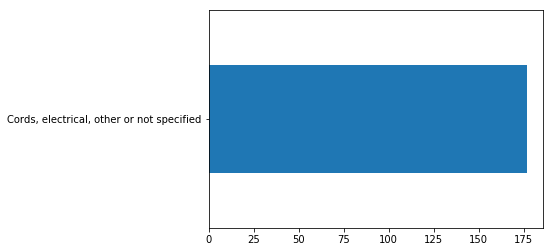

In [104]:
dfnss_products.prod1_desc.str.extract('(.*?[^ not] electrical.*)').value_counts(ascending=True).plot(kind='barh')

## When people get injuries using an electrical product, what part of their body is injured?

In [111]:
dfnss_products[dfnss_products.prod1_desc.str.contains('(.*?[^ not] electrical.*)')].body_part.value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


head                 28
face                 18
lower trunk          17
upper trunk          13
knee                 13
foot                 13
hand                 10
shoulder              9
eyeball               8
lower arm             7
ankle                 6
upper arm             5
neck                  5
elbow                 4
all parts of body     4
mouth                 3
lower leg             3
finger                3
not recorded          2
toe                   2
upper leg             2
wrist                 2
Name: body_part, dtype: int64

## What product is most likely to injure your mouth?

In [107]:
dfnss_products[dfnss_products.body_part == 'mouth'].prod1_desc.value_counts().head(10)

Floors or flooring materials                                                                                              655
Beds or bedframes, other or not specified                                                                                 469
Tables, not elsewhere classified (excl. baby changing tables, billiard or pool tables and television tables or stands)    461
Stairs or steps (excluding pull-down and folding stairs)                                                                  454
Bicycles or accessories (excluding mountain or all-terrain bicycles)                                                      353
Basketball (activity, apparel or equipment)                                                                               346
Chairs, other or not specified                                                                                            326
Sofas, couches, davenports, divans or studio couches                                                                  

## What product is most likely to injure your ears?

In [109]:
dfnss_products[dfnss_products.body_part == 'ear'].prod1_desc.value_counts().head(10)

Jewelry (excluding watches)                                                                                               1209
Swimming (activity, apparel or equipment; excluding flotation devices)                                                    1003
Paper products (excluding bags, cups, straws and cardboard products)                                                       159
Tables, not elsewhere classified (excl. baby changing tables, billiard or pool tables and television tables or stands)     128
Beds or bedframes, other or not specified                                                                                   99
Stereo or hi-fi components or accessories (excluding self-contained units)                                                  98
Pens and pencils                                                                                                            91
Swimming pools, not specified                                                                                  